In [99]:
!pip install unidecode

# Data Structures
import numpy  as np
import pandas as pd
import json
# Corpus Processing
import re
import nltk
import nltk.corpus
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from unidecode import unidecode
# K-Means
from sklearn import cluster
# hierarchical 
from sklearn.cluster import AgglomerativeClustering

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
#from google.colab import files
#uploaded = files.upload()

In [101]:
import pandas as pd
df = pd.read_csv("scraped_pattern_data_gofpatterns_revised.csv")
#df = pd.read_csv("GoF problem domain (complete).csv")
#df = df.drop([0, 1, 2, 3])
df = df.drop_duplicates(subset=['name'])

In [102]:
#df['overview'] = df['intent'] + " " + df['problem'] + " " + df['discussion'] + " " + df['structure']
#df['overview'] = df['intent'] + " " + df['motivation'] + " " + df['applicability']
df.head()

,id,category_id,name,overview
0,91,0,abstract_factory_pattern,\nQuestion:What is the abstract factory patter...
1,92,0,decorator_pattern,The Decorator pattern enables you to add or re...
2,93,0,facade_pattern,\r\nThe Facade pattern provides a unified inte...
3,94,0,composite_pattern,\r\nThe Composite pattern enables you to creat...
4,95,0,factory_method_pattern,"\r\nIn a factory pattern, a concrete class wit..."


In [103]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [104]:
nltk.download('stopwords')
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = str(corpus[index]).replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
corpus = df['overview'].tolist()
corpus[18][0:447]

'\r\nThe Chain of Responsibility pattern establishes a chain within a system, so that a message can either be handled at the level where it is first received, or be directed to an object that can handle it.\r\n\r\nThe following lists the benefits of using the Chain of Responsibility pattern:\r\n\nReduced coupling\nAdded flexibility in assigning responsibilites to objects\nAllows a set of classes to behave as a whole, because events produced in one class c'

In [106]:
import nltk
nltk.download('punkt')

language = 'english'
corpus = processCorpus(corpus, language)
corpus[18][0:460]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'chain respons pattern establish chain within system messag either handl level first receiv direct object handl follow list benefit use chain respons pattern reduc coupl ad flexibl assign responsibilit object allow set class behav whole event produc one class sent handler class within composit use chain respons pattern one object handl request handler known want issu request one sever object without specifi receiv complet set object handl request specifi dy'

In [107]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


23 rows


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
factori,0.523540,0.000000,0.000000,0.000000,0.520564,0.124991,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000
abstract,0.314843,0.000000,0.036315,0.000000,0.037268,0.093958,0.000000,0.064141,0.000000,0.432316,...,0.0,0.0,0.073958,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000
concret,0.289016,0.000000,0.000000,0.000000,0.022807,0.038334,0.000000,0.000000,0.000000,0.105827,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000
product,0.216762,0.000000,0.000000,0.000000,0.045615,0.076667,0.000000,0.157011,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000
class,0.205258,0.171806,0.022282,0.019116,0.240107,0.230606,0.229176,0.078712,0.202638,0.238737,...,0.0,0.0,0.000000,0.045345,0.0,0.07512,0.038521,0.04163,0.015374,0.124028


In [108]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
factori,0.523540,0.000000,0.000000,0.000000,0.520564,0.124991,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000
abstract,0.314843,0.000000,0.036315,0.000000,0.037268,0.093958,0.000000,0.064141,0.000000,0.432316,...,0.0,0.0,0.073958,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000
concret,0.289016,0.000000,0.000000,0.000000,0.022807,0.038334,0.000000,0.000000,0.000000,0.105827,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000
product,0.216762,0.000000,0.000000,0.000000,0.045615,0.076667,0.000000,0.157011,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000
class,0.205258,0.171806,0.022282,0.019116,0.240107,0.230606,0.229176,0.078712,0.202638,0.238737,...,0.0,0.0,0.000000,0.045345,0.0,0.07512,0.038521,0.04163,0.015374,0.124028


In [109]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               #, n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [110]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


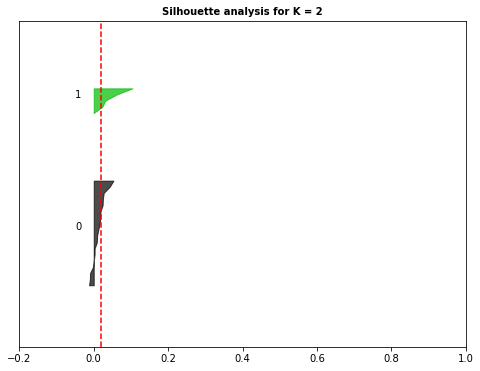

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


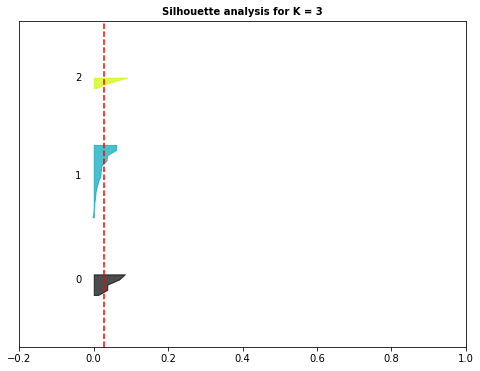

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


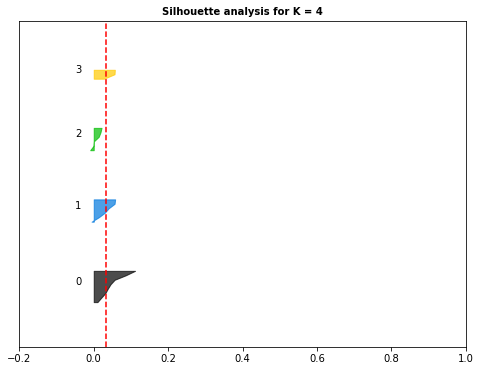

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


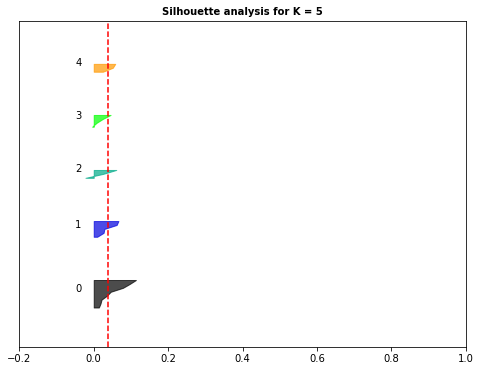

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


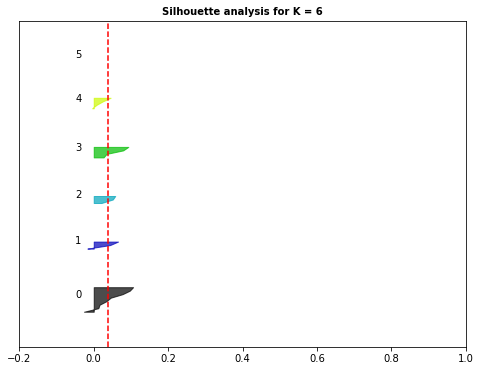

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


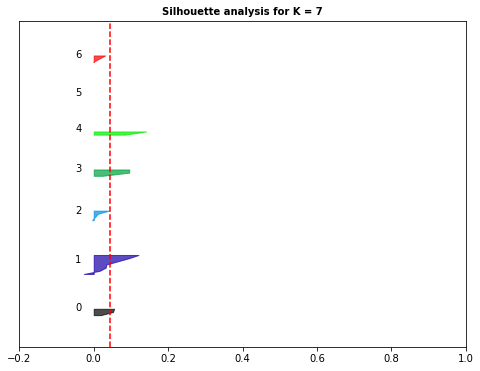

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


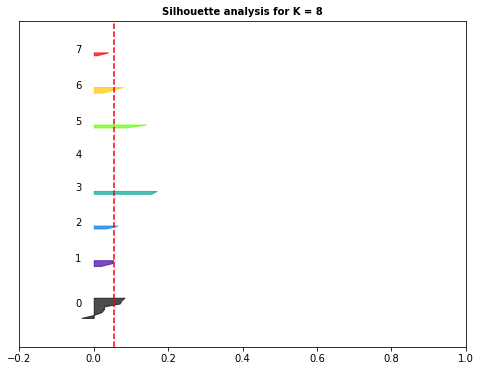

In [111]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

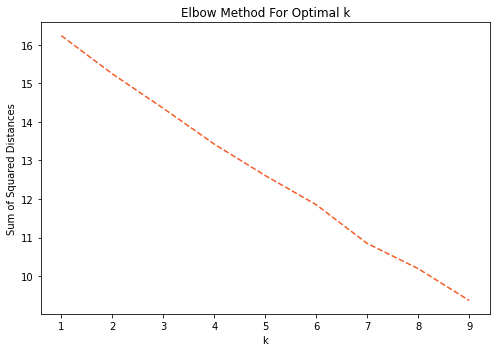

In [112]:
# Use the elbow method to automatically determine the best number of clusters (the number of design pattern categories to consider)?
# Source: https://github.com/broepke/TextClustering/blob/main/text_clustering.ipynb

from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['overview'])

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(7,5))
ax = sns.lineplot(x=K, y=Sum_of_squared_distances)
#732F2F
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#F25D27")

# Add a vertical line to show the optimum number of clusters
#plt.axvline(2, color='#1A2226', linestyle=':')

plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')

plt.tight_layout()
plt.savefig('textclustering_elbow.png', dpi=300)
plt.show();

In [113]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


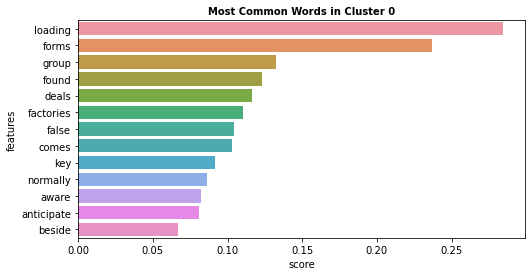

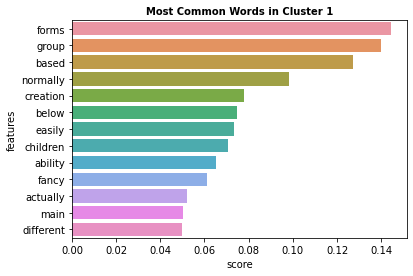

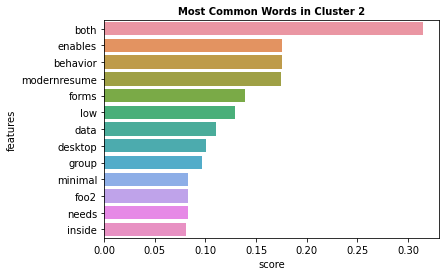

In [114]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [115]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

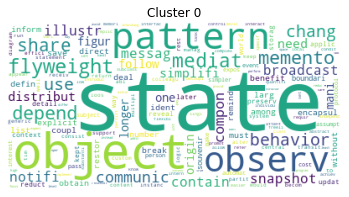

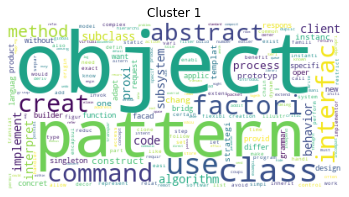

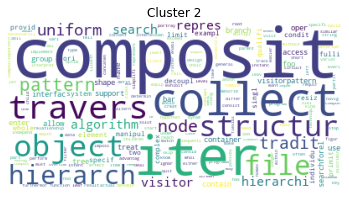

In [116]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [117]:
# Assigning the cluster labels to each pattern
labels = kmeans.labels_ 
df['label'] = labels
df

,id,category_id,name,overview,label
0,91,0,abstract_factory_pattern,\nQuestion:What is the abstract factory patter...,1
1,92,0,decorator_pattern,The Decorator pattern enables you to add or re...,1
2,93,0,facade_pattern,\r\nThe Facade pattern provides a unified inte...,1
3,94,0,composite_pattern,\r\nThe Composite pattern enables you to creat...,2
4,95,0,factory_method_pattern,"\r\nIn a factory pattern, a concrete class wit...",1
5,96,0,prototype_pattern,\r\nThe Prototype pattern allows an object to ...,1
6,97,0,adapter_pattern,\r\nThe Adapter pattern acts as an intermediar...,1
7,98,0,builder_pattern,\r\nThe Builder pattern separates the construc...,1
8,99,0,singleton_pattern,The Singleton pattern ensures that a class has...,1
9,100,0,bridge_pattern,Divide a complex component into 2 separate but...,1


In [118]:
print("Cluster centroids: \n")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
tempk = 3
for i in range(tempk):
  print("Cluster %d:" % i)
  for j in order_centroids[i, :10]: #print out 10 features terms of each cluster
    print('%s'% terms[j])
  print('------------------')

Cluster centroids: 

Cluster 0:
loading
forms
group
found
deals
factories
false
comes
key
normally
------------------
Cluster 1:
forms
group
based
normally
creation
below
easily
children
ability
fancy
------------------
Cluster 2:
both
enables
behavior
modernresume
forms
low
data
desktop
group
foo2
------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [119]:
!pip install fuzzy-c-means
from fcmeans import FCM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
my_model = FCM(n_clusters=3) # we use three cluster as an example
my_model.fit(final_df_array) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
fuzzLabels = my_model.predict(final_df_array)

df['fuzzLabels'] = fuzzLabels
df

,id,category_id,name,overview,label,fuzzLabels
0,91,0,abstract_factory_pattern,\nQuestion:What is the abstract factory patter...,1,1
1,92,0,decorator_pattern,The Decorator pattern enables you to add or re...,1,0
2,93,0,facade_pattern,\r\nThe Facade pattern provides a unified inte...,1,2
3,94,0,composite_pattern,\r\nThe Composite pattern enables you to creat...,2,2
4,95,0,factory_method_pattern,"\r\nIn a factory pattern, a concrete class wit...",1,1
5,96,0,prototype_pattern,\r\nThe Prototype pattern allows an object to ...,1,1
6,97,0,adapter_pattern,\r\nThe Adapter pattern acts as an intermediar...,1,1
7,98,0,builder_pattern,\r\nThe Builder pattern separates the construc...,1,1
8,99,0,singleton_pattern,The Singleton pattern ensures that a class has...,1,2
9,100,0,bridge_pattern,Divide a complex component into 2 separate but...,1,1


In [121]:
# initialize test data
data = ["Design a drawing editor. A design is composed of te graphics (lines, rectangles and roses), positioned at precise positions. Each graphic form must be modeled by a class that provides a method draw(): void. A rose is a complex graphic designed by a black-box class component. This component performs this drawing in memory, and provides access through a method getRose(): int that returns the address of the drawing. It is probable that the system evolves in order to draw circles."]

# Create test data frame
#dfTest = pd.DataFrame(data, columns=['TestDesignProblem'])
#corpusTest = dfTest['TestDesignProblem'].tolist()
#corpusTest[0][0:447]

# Append the problem to the existing data frame of patterns, with the problem statement written to the 'overview' column and the other columns left blank
#new_row = {'category_id':0, 'name':'design_problem', 'intent':'', 'problem':'', 'discussion':'', 'structure':'', 'overview':data[0]}
new_row = {'category_id':0, 'name':'design_problem', 'overview':data[0]}

#append row to the dataframe
dfTest = df.append(new_row, ignore_index=True)
corpusTest = dfTest['overview'].tolist()
#corpusTest[24][0:200]

In [122]:
corpusTest = processCorpus(corpusTest, language)
#corpusTest[26][0:460]

In [123]:
vectorizer_test = TfidfVectorizer()
X_test = vectorizer_test.fit_transform(corpusTest)
tf_idf_test = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

final_df_test = tf_idf_test

print("{} rows".format(final_df_test.shape[0]))
final_df_test.T.nlargest(5, 0)

24 rows


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
factori,0.523091,0.000000,0.000000,0.000000,0.523393,0.125021,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
abstract,0.316071,0.000000,0.036556,0.000000,0.037649,0.094428,0.00000,0.064426,0.000000,0.434167,...,0.0,0.074165,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
concret,0.289130,0.000000,0.000000,0.000000,0.022960,0.038391,0.00000,0.000000,0.000000,0.105910,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
product,0.216848,0.000000,0.000000,0.000000,0.045920,0.076781,0.00000,0.157160,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
class,0.200047,0.167113,0.021776,0.018589,0.235485,0.224998,0.22359,0.076756,0.198037,0.232766,...,0.0,0.000000,0.044302,0.0,0.073193,0.037431,0.040801,0.015022,0.120828,0.08846


In [124]:
# kmeans for test problem
k = 8
kmeans_results = run_KMeans(k, final_df_test)

kmeans = kmeans_results.get(3)
prediction = kmeans.predict(final_df_test)
labels = kmeans.labels_ 
dfTest['kmeans'] = labels

# hierarcial for test problem
ward = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(final_df_test)
dfTest['hward'] = ward.labels_

# fuzzMeans for test problem
my_model = FCM(n_clusters=3) # we use three clusters as an example
my_model.fit(final_df_test.to_numpy()) # parameter: numpy array. rows:samples columns:features
centers = my_model.centers
fuzzLabels = my_model.predict(final_df_test.to_numpy())

dfTest['fuzzLabels'] = fuzzLabels
dfTest

,id,category_id,name,overview,label,fuzzLabels,kmeans,hward
0,91.0,0,abstract_factory_pattern,\nQuestion:What is the abstract factory patter...,1.0,0,1,1
1,92.0,0,decorator_pattern,The Decorator pattern enables you to add or re...,1.0,0,1,0
2,93.0,0,facade_pattern,\r\nThe Facade pattern provides a unified inte...,1.0,1,2,2
3,94.0,0,composite_pattern,\r\nThe Composite pattern enables you to creat...,2.0,1,1,0
4,95.0,0,factory_method_pattern,"\r\nIn a factory pattern, a concrete class wit...",1.0,0,1,1
5,96.0,0,prototype_pattern,\r\nThe Prototype pattern allows an object to ...,1.0,0,1,1
6,97.0,0,adapter_pattern,\r\nThe Adapter pattern acts as an intermediar...,1.0,0,1,2
7,98.0,0,builder_pattern,\r\nThe Builder pattern separates the construc...,1.0,0,1,1
8,99.0,0,singleton_pattern,The Singleton pattern ensures that a class has...,1.0,1,1,0
9,100.0,0,bridge_pattern,Divide a complex component into 2 separate but...,1.0,0,1,1


In [125]:
print("Cluster centroids: \n")
new_centroids = centers.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
tempk = 3
for i in range(tempk):
  print("Cluster %d:" % i)
  for j in new_centroids[i, :10]: #print out 10 features terms of each cluster
    print('%s'% terms[j])
  print('------------------')

Cluster centroids: 

Cluster 0:
fundamental
has
older
become
make
employing
customize
best
circuit
branches
------------------
Cluster 1:
fundamental
has
older
become
make
employing
customize
best
circuit
branches
------------------
Cluster 2:
fundamental
has
older
become
make
employing
customize
best
circuit
branches
------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [126]:
n = dfTest.index[-1]
problemRow = dfTest.iloc[[n]]


# Using drop() function to delete last row
dfTest.drop(index=n,axis=0,inplace=True)
problemRow

,id,category_id,name,overview,label,fuzzLabels,kmeans,hward
23,NaN,0,design_problem,Design a drawing editor. A design is composed ...,NaN,1,1,2


In [127]:
# Pattern Selection

# Get the candidate patterns:
candidates = dfTest.loc[dfTest['hward'].isin(problemRow['hward'])]
candidates

,id,category_id,name,overview,label,fuzzLabels,kmeans,hward
2,93.0,0,facade_pattern,\r\nThe Facade pattern provides a unified inte...,1.0,1,2,2
6,97.0,0,adapter_pattern,\r\nThe Adapter pattern acts as an intermediar...,1.0,0,1,2
13,104.0,0,interpreter_pattern,\r\nThe Interpreter pattern interprets a langu...,1.0,1,2,2
14,105.0,0,iterator_pattern,\r\nThe iterator pattern provides a consistent...,2.0,1,2,2
20,112.0,0,template_pattern,\r\nThe Template Method pattern provides a met...,1.0,0,2,2
22,114.0,0,strategy_pattern,\r\nThe intent of the Strategy Pattern is to d...,1.0,1,2,2


In [128]:
# # Append the problem row to the new DataFrame of candidate patterns
# candidates = candidates.append(problemRow, ignore_index = True)

# # Now perform ML again using different clusters.
# # fuzzMeans for test problem
# my_model = FCM(n_clusters=3) # we use three clusters as an example
# my_model.fit(candidates.to_numpy()) # parameter: numpy array. rows:samples columns:features
# centers = my_model.centers
# fuzzLabels = my_model.predict(candidates.to_numpy())

# candidates['fuzzLabelsSelect'] = fuzzLabels
# candidates

# First, perform preprocessing.

# processedProblem = problemRow['overview'].tolist()
# processedProblem = processCorpus(processedProblem, language)
# X_test = vectorizer_test.fit_transform(processedProblem)
# processedProblem = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

# processedPatterns = candidates['overview'].tolist()
# processedPatterns = processCorpus(processedPatterns, language)
# X_test = vectorizer_test.fit_transform(processedPatterns)
# processedPatterns = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

#from numpy.linalg import norm

# Use the cosine similarity measure to find the best pattern(s) for the problem.

#A = pd.to_numeric(processedPatterns['overview'])
#B = pd.to_numeric(processedProblem['overview'])

#cosine = np.dot(A,B)/(norm(A, axis=1)*norm(B))
#cosine

# Source: https://sites.temple.edu/tudsc/2017/03/30/measuring-similarity-between-texts-in-python/

import string

#documents = [ candidates.iloc[0]['overview'], problemRow.iloc[0]['overview'] ]
documents = []
for index, rows in candidates.iterrows():
    my_list = rows['overview']
    documents.append(my_list)
documents.append(problemRow.iloc[0]['overview'])

nltk.download('wordnet')
nltk.download('omw-1.4')
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
def cos_similarity(textlist):
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()
sim_matrix = cos_similarity(documents)
sim_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


array([[1.        , 0.28385092, 0.08943382, 0.09787334, 0.07198481,
        0.11906628, 0.03601973],
       [0.28385092, 1.        , 0.04627783, 0.14016387, 0.08091425,
        0.12942603, 0.06135142],
       [0.08943382, 0.04627783, 1.        , 0.08888349, 0.07214159,
        0.09778673, 0.        ],
       [0.09787334, 0.14016387, 0.08888349, 1.        , 0.10977958,
        0.1414308 , 0.02489687],
       [0.07198481, 0.08091425, 0.07214159, 0.10977958, 1.        ,
        0.25627245, 0.08219377],
       [0.11906628, 0.12942603, 0.09778673, 0.1414308 , 0.25627245,
        1.        , 0.02187639],
       [0.03601973, 0.06135142, 0.        , 0.02489687, 0.08219377,
        0.02187639, 1.        ]])

In [129]:
# Find the highest cosine similarity to the design problem in the similarity matrix.
# That index corresponds to the best pattern for the design problem.
# Also include runners-up.

indices = []

i = 0
for sim in sim_matrix[len(sim_matrix)-1][:-1]:
  indices.append((i, sim))
  i += 1

#indices

sorted_patterns = sorted(indices,key=lambda x: x[1], reverse=True)
#sorted_patterns

best_pattern_names = []
for i in range(len(sorted_patterns)):
  best_pattern_names.append(candidates.iloc[sorted_patterns[i][0]]['name'])
best_pattern_names

['template_pattern',
 'adapter_pattern',
 'facade_pattern',
 'iterator_pattern',
 'strategy_pattern',
 'interpreter_pattern']

In [130]:
print("Cluster centroids: \n")
k_order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
f_order_centroids = my_model.centers.argsort()[:, ::-1]

#my_model.
k_order_centroids

Cluster centroids: 



array([[596, 418, 448, ..., 514,  61, 133],
       [418,  81, 448, ..., 222, 174, 602],
       [ 18, 448, 612, ..., 389, 419, 133]])